# Multiple Linear Regression
## Bike Sharing System

#### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. Therefore they want to understand the factors affecting the demand for these shared bikes in the American market.

The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.

- How well those variables describe the bike demands.

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features

##### Business Goal: 
Required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. So they can manipulate the business strategy to meet the demand levels and meet the customer's expectations as well as the model will be a good way for the management to understand the demand dynamics of a new market. 

### Steps to Follow...
1. Reading, Understanding and Visualising the Data

2. Preparing the data for modelling (Train-test split, rescaling etc.)

3. Training the model

4. Residual analysis

5. Predictions and evaluation on the test set

6. Model Evaluation

--------------------------------

1. Reading and Understanding Data
2. Visualising the Data
3. Data Preparation
4. Splitting the Data into Training and Testing Sets
5. Feature Scaling
6. Building the Model
7. Residual Analysis of the train data
8. Making predictions using final model
9. Model Evaluation

## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the dataset

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels
import statsmodels.api as sm

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [4]:
# To set the Row, Column and Width of the Dataframe to show on Jupyter Notebook
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)


In [5]:
# To read given dataset 
bike = pd.read_csv("F:/Upgrade/Course-2/Machine Learning-1/Module_2 Assignment/day.csv")


In [6]:
# Check the head of the dataset
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Inspect the various aspects of the bike dataframe

In [7]:
bike.shape

(730, 16)

In [8]:
bike.info()  # To see missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Convert Numercal Data into Categorical Data

In [10]:
# To convert season column into categorical data
bike['season'] = bike['season'].replace({ 1: "spring", 2:"summer", 3:"fall", 4:"winter"})

# To convert mnth column into categorical data
bike['mnth'] = bike['mnth'].replace({ 1: "Jan", 2:"Feb", 3:"March", 4:"April", 5: "May", 6:"June", 7:"July", 8:"August", 9: "Sept", 10:"Oct", 11:"Nov", 12:"Dec" })

# To convert weekday column into categorical data
bike['weekday'] = bike['weekday'].replace({ 0: "Sun", 1: "Mon", 2:"Tue", 3:"Wed", 4:"Thu", 5: "Fri", 6:"Sat"})

# To convert weathersit column into categorical data
bike['weathersit'] = bike['weathersit'].replace({ 1: "Clear or Partly Cloudy", 2: "Mist_Few Clouds", 3: "Light Rain_Light Snow", 4: "Heavy Rain_Ice Pallets_Mist"})


In [141]:
bike.head(300)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Mon,1,Mist_Few Clouds,14.110847,18.181250,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Tue,1,Mist_Few Clouds,14.902598,17.686950,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Wed,1,Clear or Partly Cloudy,8.050924,9.470250,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Thu,1,Clear or Partly Cloudy,8.200000,10.606100,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Fri,1,Clear or Partly Cloudy,9.305237,11.463500,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,spring,0,Jan,0,Sat,0,Clear or Partly Cloudy,8.378268,11.660450,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,spring,0,Jan,0,Sun,0,Mist_Few Clouds,8.057402,10.441950,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,spring,0,Jan,0,Mon,1,Mist_Few Clouds,6.765000,8.112700,53.5833,17.875868,68,891,959
8,9,09-01-2018,spring,0,Jan,0,Tue,1,Clear or Partly Cloudy,5.671653,5.808750,43.4167,24.250650,54,768,822
9,10,10-01-2018,spring,0,Jan,0,Wed,1,Clear or Partly Cloudy,6.184153,7.544400,48.2917,14.958889,41,1280,1321


In [11]:
bike.dtypes

instant         int64
dteday         object
season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

#### Need to remove unwanted columns...
- 'instant' column is need to remove as it is only the index and not required in analysis.
- 'dteday' column also not required as it's value is alreaday given in 'yr', 'mnth' column.
- 'casual' and 'registered' columns are not required as they are already included in 'cnt' column which is showing count of  
   total rental bikes of casual and registered.
- 'temp' and 'atemp' are corelated to each other therefore we can drop 'temp' column.

In [12]:
# To drop various unnecessary columns
bike.drop(['instant', 'dteday', 'casual','registered','temp'], axis=1, inplace=True)

In [13]:
bike.shape

(730, 11)

In [14]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


In [146]:
bike.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.462641,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,16.889713,52.000000,9.041650,3169.750000
50%,0.500000,0.000000,1.000000,24.368225,62.625000,12.125325,4548.500000
75%,1.000000,0.000000,1.000000,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,42.044800,97.250000,34.000021,8714.000000


In [15]:
bike.head(730)

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Mist_Few Clouds,18.181250,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist_Few Clouds,17.686950,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear or Partly Cloudy,9.470250,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear or Partly Cloudy,10.606100,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear or Partly Cloudy,11.463500,43.6957,12.522300,1600
5,spring,0,Jan,0,Sat,0,Clear or Partly Cloudy,11.660450,51.8261,6.000868,1606
6,spring,0,Jan,0,Sun,0,Mist_Few Clouds,10.441950,49.8696,11.304642,1510
7,spring,0,Jan,0,Mon,1,Mist_Few Clouds,8.112700,53.5833,17.875868,959
8,spring,0,Jan,0,Tue,1,Clear or Partly Cloudy,5.808750,43.4167,24.250650,822
9,spring,0,Jan,0,Wed,1,Clear or Partly Cloudy,7.544400,48.2917,14.958889,1321


In [16]:
# To check any duplicate value in various columns
bike.duplicated().sum()

0

## Step 2: Visualising the Data

### A) Univeriate Analysis

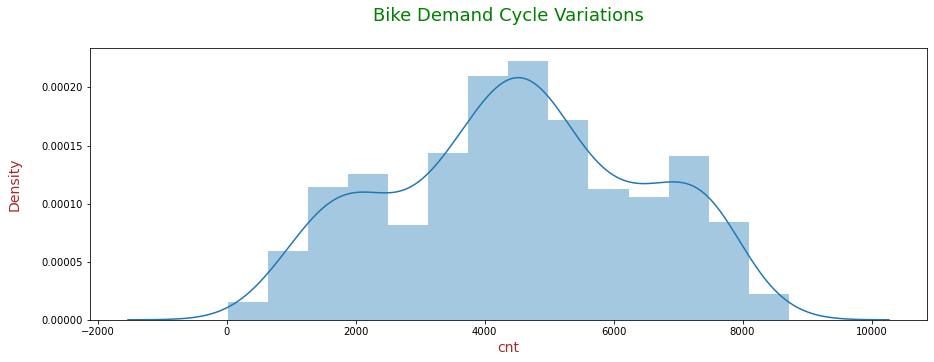

In [17]:
fig = plt.figure(figsize=(15,5))
plt.title("Bike Demand Cycle Variations\n", fontdict={'fontsize':18,'fontweight':5,'color':'Green'})
plt.xlabel("\nTotal Rental Count",fontdict={'fontsize':14,'fontweight':5,'color':'Brown'})
plt.ylabel("Density\n",fontdict={'fontsize':14,'fontweight':5,'color':'Brown'})
sns.distplot(bike.cnt)
plt.show()


### Inferences:
 - As per the above line graph it is showing that no. bike rentals are varying in neature but mostly it is in increasing order.
 - Recently there is sudden downfall in the demand of bike rentals which is also the business problem of the copany.

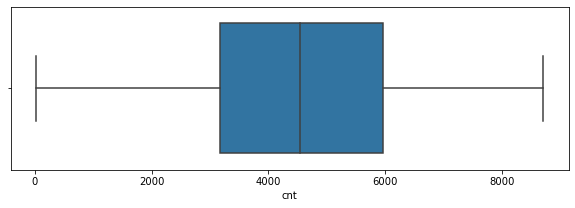

In [18]:
# To find outliers for the column 'cnt'
plt.figure(figsize = [10,3])
sns.boxplot(bike["cnt"])
plt.show()

### Inferences:
 - Minimum and maximum range of no. of counts of bike rentals is more than 3000 to 6000.
 - It is equally divided between min. and max. range wiht no outliers.

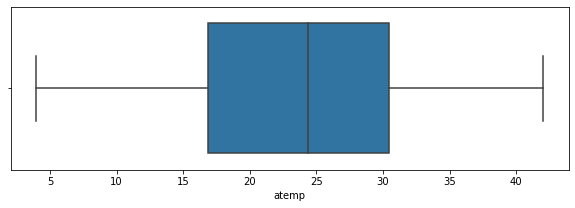

In [19]:
# To find outliers for the column 'atemp'
plt.figure(figsize = [10,3])
sns.boxplot(bike["atemp"])
plt.show()


### Inferences:
 - Minimum and maximum range of feel like temp (atemp) is in between 17 to 31 (Degree Celcious).
 - Its' lower part is higher than its' upper part and it doesn't have any outliers.

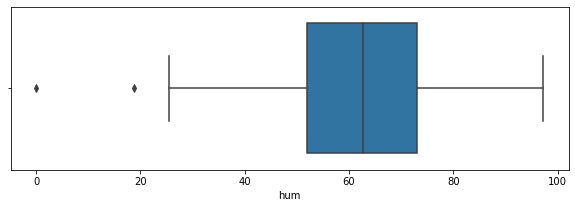

In [20]:
# To find outliers for the column 'hum'
plt.figure(figsize = [10,3])
sns.boxplot(bike["hum"])
plt.show()


### Inferences:
 - Minimum and maximum range of humidity (hum) is in between 52 to approx. 73.
 - It is equally divided and doesn't have much outliers.

In [21]:
# Find out the quantile (0,0.0009,0.0018,0.003,0.007,0.015, 0.03, 0.06,0.125, 0.25, 0.5, 0.7, 0.75, 0.8, 0.9, 0.95, 0.99, 1) of 'hum' column
bike["hum"].quantile([0,0.0009,0.0018,0.003, 0.007, 0.015, 0.03, 0.06, 0.125, 0.25, 0.5, 0.7, 0.75, 0.8, 0.9, 0.95, 0.99, 1])

0.0000     0.000000
0.0009    12.329234
0.0018    20.860025
0.0030    25.821854
0.0070    30.246508
0.0150    31.827886
0.0300    38.102619
0.0600    41.623358
0.1250    46.718725
0.2500    52.000000
0.5000    62.625000
0.7000    70.750000
0.7500    72.989575
0.8000    75.291700
0.9000    81.762500
0.9500    86.868735
0.9900    92.795857
1.0000    97.250000
Name: hum, dtype: float64

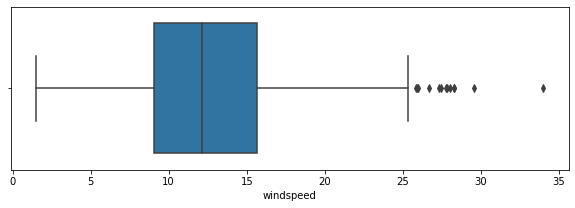

In [22]:
# To find outliers for the column 'windspeed'
plt.figure(figsize = [10,3])
sns.boxplot(bike["windspeed"])
plt.show()


### Inferences:
 - Minimum (25%) and maximum (75%) range of windspeed (m/s) is in between 9 to 16 (m/s).
 - It is equally divided and has few outliters between 90% and 100% but doesn't have very big difference.

In [23]:
# Find out the quantile (0.25, 0.5, 0.7, 0.75, 0.8, 0.9, 0.95, 0.99, 1) of 'hum' column
bike["windspeed"].quantile([0.25, 0.5, 0.7, 0.75, 0.8, 0.9, 0.95, 0.99, 1])


0.25     9.041650
0.50    12.125325
0.70    14.971271
0.75    15.625589
0.80    16.639785
0.90    19.833997
0.95    22.999988
0.99    27.380948
1.00    34.000021
Name: windspeed, dtype: float64

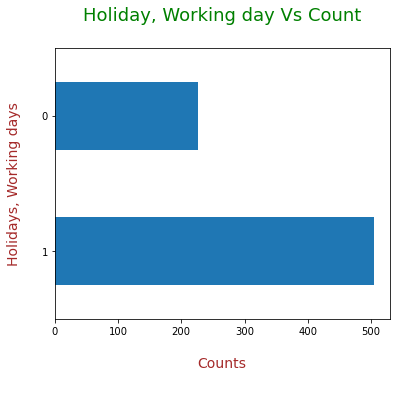

In [24]:
# To analyze workingdays and holidays whether number of working days are more or less ('1' = working day/weekdays, '0'= holidays/weekend )
fig = plt.figure(figsize=(6,5))
bike['workingday'].value_counts().plot.barh()
plt.title("Holiday, Working day Vs Count\n", fontdict={'fontsize':18,'fontweight':5,'color':'Green'})
plt.xlabel("\nCounts\n",fontdict={'fontsize':14,'fontweight':5,'color':'Brown'})
plt.ylabel("Holidays, Working days\n",fontdict={'fontsize':14,'fontweight':5,'color':'Brown'})
plt.show()


### Inferences:
 - Working days are more than double with respect to no. of holidays/weekends.

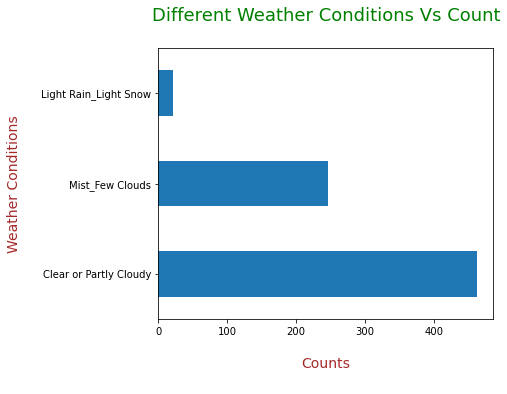

In [25]:
# To analyze differnt weather conditions, need to analyze 'weathersit' column
fig = plt.figure(figsize=(6,5))
bike['weathersit'].value_counts().plot.barh()
plt.title("Different Weather Conditions Vs Count\n", fontdict={'fontsize':18,'fontweight':5,'color':'Green'})
plt.xlabel("\nCounts\n",fontdict={'fontsize':14,'fontweight':5,'color':'Brown'})
plt.ylabel("Weather Conditions\n",fontdict={'fontsize':14,'fontweight':5,'color':'Brown'})
plt.show()


### Inferences:
 - As per the analysis of various Weather conditions it is clear that weather is mostly 'Partly_Cloudy' and very less no. of 'Thunderstorm_Scattered_Clouds'.

### B) Bivariate/Multivariate Analysis

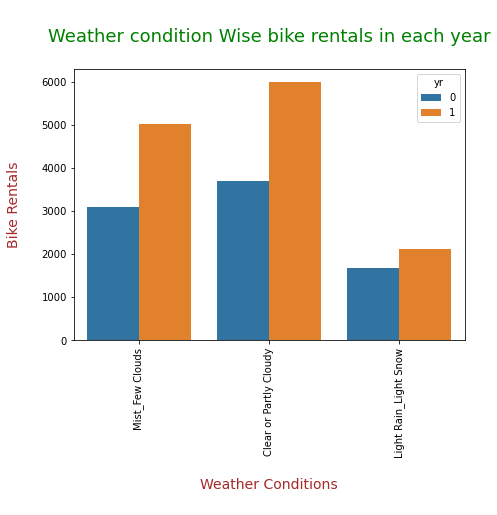

In [26]:
# To analyze weather conditions total rentals of bike in different year (2018, 2019) 
fig = plt.figure(figsize=(7,5))
sns.barplot(data=bike, x='weathersit', y='cnt', hue='yr', ci=None)
plt.title("\nWeather condition Wise bike rentals in each year\n", fontdict={'fontsize':18,'fontweight':5,'color':'Green'})
plt.xlabel("\nWeather Conditions\n",fontdict={'fontsize':14,'fontweight':5,'color':'Brown'})
plt.xticks(rotation=90)
plt.ylabel("Bike Rentals\n",fontdict={'fontsize':14,'fontweight':5,'color':'Brown'})
plt.show()


### Inferences:
 - Bike Rentals are more during 'Partly_Clody'weather and very minimum during 'Thunderstorm_Scattered_Columns'.
 - It is laso clear that during same weather conditions no. of overall bike renatlas are more in 2019 in comparision to 2018.
 - '0' referes to year 2018, '1' refers to year 2019.

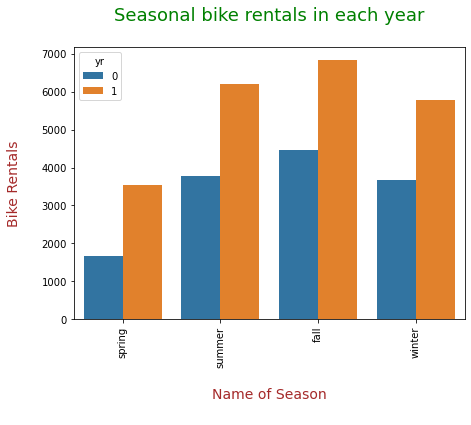

In [27]:
# To analyze weather wise total rentals of bike in different year (2018, 2019) 
fig = plt.figure(figsize=(7,5))
sns.barplot(data=bike, x='season', y='cnt', hue='yr', ci=None)
plt.title("Seasonal bike rentals in each year\n", fontdict={'fontsize':18,'fontweight':5,'color':'Green'})
plt.xlabel("\nName of Season\n",fontdict={'fontsize':14,'fontweight':5,'color':'Brown'})
plt.xticks(rotation=90)
plt.ylabel("Bike Rentals\n",fontdict={'fontsize':14,'fontweight':5,'color':'Brown'})
plt.show()


### Inferences:
 - Bike Rentals are highest in 'fall' season whereas very minimum during 'Spring' season. Whereas more in 'winter' than  'spring'.
 - Bike Rentals are 2nd largest in 'Summer' season.   
 - It is also clear that during same season overall bike renatlas are more in 2019 in comparision to 2018.

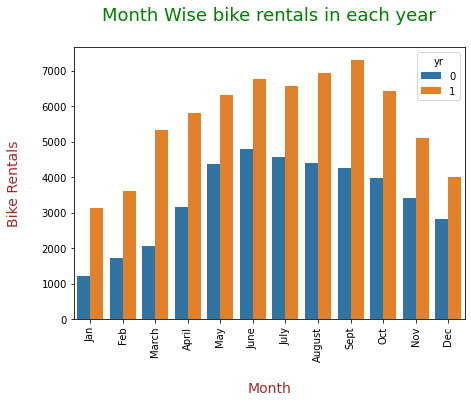

In [28]:
# To analyze weather wise total rentals of bike in different year (2018, 2019) 
fig = plt.figure(figsize=(7,5))
sns.barplot(data=bike, x='mnth', y='cnt', hue='yr', ci=None)
plt.title("Month Wise bike rentals in each year\n", fontdict={'fontsize':18,'fontweight':5,'color':'Green'})
plt.xlabel("\nMonth\n",fontdict={'fontsize':14,'fontweight':5,'color':'Brown'})
plt.xticks(rotation=90)
plt.ylabel("Bike Rentals\n",fontdict={'fontsize':14,'fontweight':5,'color':'Brown'})
plt.show()


### Inferences:
 - Bike Rentals in 2019 are highest in 'September' month whereas very minimum during 'January' month, whereas little bit higher in June in 2018.
 - Bike rentals are in increasing order from January to June in both the year, and in decreasing order from  September to December in both the year.   

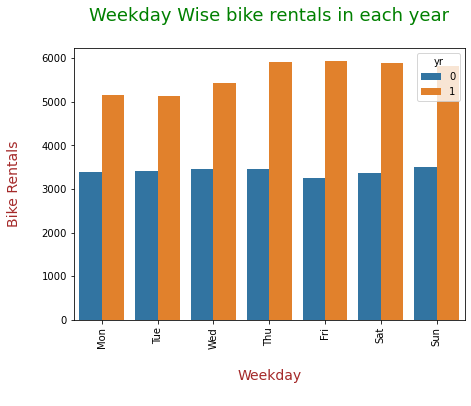

In [29]:
# To analyze weekday wise total rentals of bike in different year (2018, 2019) 
fig = plt.figure(figsize=(7,5))
sns.barplot(data=bike, x='weekday', y='cnt', hue='yr', ci=None)
plt.title("Weekday Wise bike rentals in each year\n", fontdict={'fontsize':18,'fontweight':5,'color':'Green'})
plt.xlabel("\nWeekday\n",fontdict={'fontsize':14,'fontweight':5,'color':'Brown'})
plt.xticks(rotation=90)
plt.ylabel("Bike Rentals\n",fontdict={'fontsize':14,'fontweight':5,'color':'Brown'})
plt.show()


### Inferences:
 - During 2018 Bike Rentals are almost equal on each day of the week but slighltly less on Friday.
 - In comparision to 2018 Bike Rentals are more in 2019 on each day of the week and increasing order from Monday to Thursday.
 - During 2019 Bike Rentals are almost same from Thursday to Sunday.

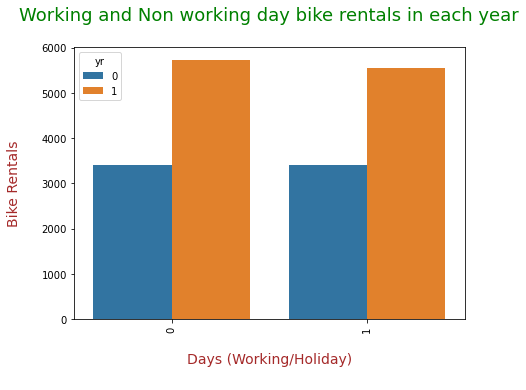

In [30]:
# To analyze weather wise total rentals of bike in different year (2018, 2019) 
fig = plt.figure(figsize=(7,5))
sns.barplot(data=bike, x='workingday', y='cnt', hue='yr', ci=None)
plt.title("Working and Non working day bike rentals in each year\n", fontdict={'fontsize':18,'fontweight':5,'color':'Green'})
plt.xlabel("\nDays (Working/Holiday)\n",fontdict={'fontsize':14,'fontweight':5,'color':'Brown'})
plt.xticks(rotation=90)
plt.ylabel("Bike Rentals\n",fontdict={'fontsize':14,'fontweight':5,'color':'Brown'})
plt.show()


### Inferences:
 - Bike rentals are little slightly more on Holidays in comparision to working days.
 - These rentals are higher in 2019 in comparision to 2018.

In [31]:
bike.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'atemp', 'hum', 'windspeed', 'cnt'], dtype='object')

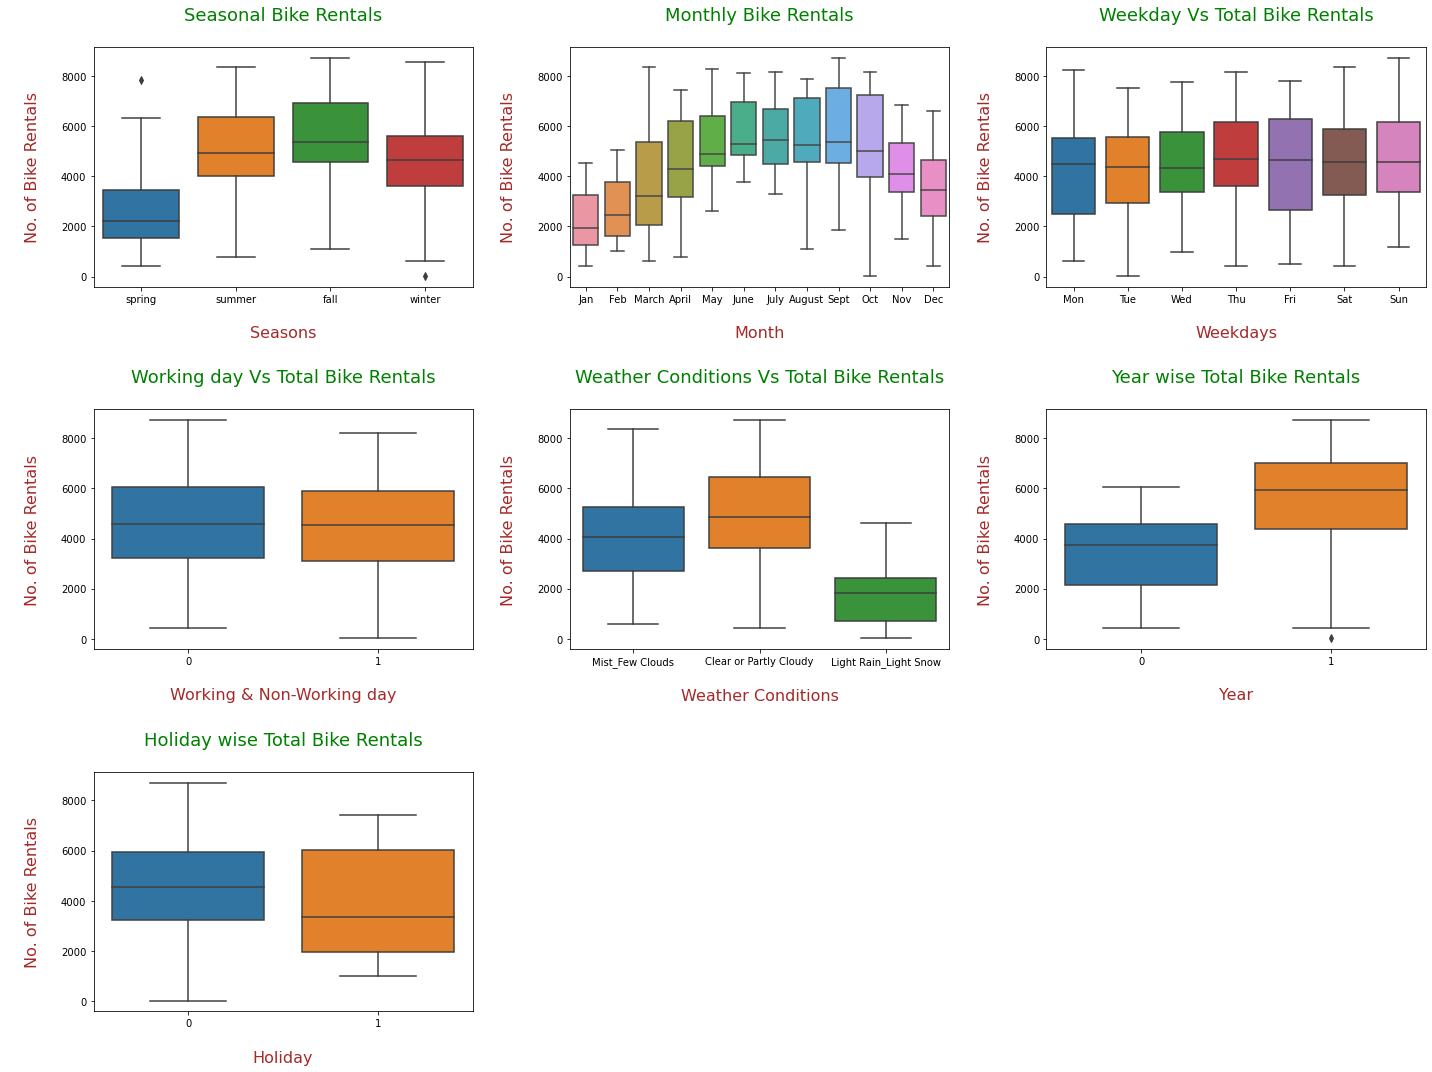

In [32]:
# Box plot - to analysis various categorcial data.
%matplotlib inline
fig = plt.figure(figsize=(20, 15))
fig1 = fig.add_subplot(3, 3, 1)    # For adding subplot side by side
sns.boxplot(data=bike, x='season', y='cnt', ax=fig1)
plt.title("Seasonal Bike Rentals\n", fontdict={'fontsize':18,'fontweight':5,'color':'Green'})
plt.xlabel("\nSeasons\n",fontdict={'fontsize':16,'fontweight':5,'color':'Brown'})
plt.ylabel("\nNo. of Bike Rentals\n",fontdict={'fontsize':16,'fontweight':5,'color':'Brown'})

fig2 = fig.add_subplot(3, 3, 2)    # For adding subplot side by side
sns.boxplot(data=bike, x='mnth', y='cnt', ax=fig2)
plt.title("Monthly Bike Rentals\n", fontdict={'fontsize':18,'fontweight':5,'color':'Green'})
plt.xlabel("\nMonth",fontdict={'fontsize':16,'fontweight':5,'color':'Brown'})
plt.ylabel("\nNo. of Bike Rentals\n",fontdict={'fontsize':16,'fontweight':5,'color':'Brown'})

fig3 = fig.add_subplot(3, 3, 3)    # For adding subplot side by side
sns.boxplot(data=bike, x='weekday', y='cnt', ax=fig3)
plt.title("Weekday Vs Total Bike Rentals\n", fontdict={'fontsize':18,'fontweight':5,'color':'Green'})
plt.xlabel("\nWeekdays",fontdict={'fontsize':16,'fontweight':5,'color':'Brown'})
plt.ylabel("\nNo. of Bike Rentals\n",fontdict={'fontsize':16,'fontweight':5,'color':'Brown'})

fig4 = fig.add_subplot(3, 3, 4)    # For adding subplot side by side
sns.boxplot(data=bike, x='workingday', y='cnt', ax=fig4)
plt.title("Working day Vs Total Bike Rentals\n", fontdict={'fontsize':18,'fontweight':5,'color':'Green'})
plt.xlabel("\nWorking & Non-Working day",fontdict={'fontsize':16,'fontweight':5,'color':'Brown'})
plt.ylabel("\nNo. of Bike Rentals\n",fontdict={'fontsize':16,'fontweight':5,'color':'Brown'})

fig5 = fig.add_subplot(3, 3, 5)    # For adding subplot side by side
sns.boxplot(data=bike, x='weathersit', y='cnt', ax=fig5)
plt.title("Weather Conditions Vs Total Bike Rentals\n", fontdict={'fontsize':18,'fontweight':5,'color':'Green'})
plt.xlabel("\nWeather Conditions",fontdict={'fontsize':16,'fontweight':5,'color':'Brown'})
plt.ylabel("\nNo. of Bike Rentals\n",fontdict={'fontsize':16,'fontweight':5,'color':'Brown'})

fig6 = fig.add_subplot(3, 3, 6)    # For adding subplot side by side
sns.boxplot(data=bike, x='yr', y='cnt', ax=fig6)
plt.title("Year wise Total Bike Rentals\n", fontdict={'fontsize':18,'fontweight':5,'color':'Green'})
plt.xlabel("\nYear",fontdict={'fontsize':16,'fontweight':5,'color':'Brown'})
plt.ylabel("\nNo. of Bike Rentals\n",fontdict={'fontsize':16,'fontweight':5,'color':'Brown'})

fig7 = fig.add_subplot(3, 3, 7)    # For adding subplot side by side
sns.boxplot(data=bike, x='holiday', y='cnt', ax=fig7)
plt.title("Holiday wise Total Bike Rentals\n", fontdict={'fontsize':18,'fontweight':5,'color':'Green'})
plt.xlabel("\nHoliday",fontdict={'fontsize':16,'fontweight':5,'color':'Brown'})
plt.ylabel("\nNo. of Bike Rentals\n",fontdict={'fontsize':16,'fontweight':5,'color':'Brown'})

fig.tight_layout()
plt.show()

### Inferences:
 - Seasonal Bike rentals are highest in 'fall' season and its' upper and lower part lies in the range of above 4000 and below 7000 whereas it is distributed unevenly and its' value is more in Upper portion.
 - Seasonal bike rentals are evenly distributed during the Winter.
 - Monthly Bike rentals are highest in the month of September and its' upper and lower portion lies between 4000 to 8000, whereas it distributed unevenly.
 - Monthly Bike rentals are minimum in January month and lies between 1000 to 5000.
 - For weekdays bike rentals, these are slightly higher on Friday, in comparision to other days, but it is slightly distributed unevenly. 
 - On Saturday's upper and lower part is equally distributed.
 - If we comapre working and non-working days then these 2 are equally distributed but bike rentals are slightly higher on holidays.
 - According to weather conditions 'Partly_cloudy' weather conditions are most favorable for bke rentals whereas 'Thunderstrom_Scattered_clouds' are very less attactive for Bike rentals.
 - These two weather conditions lies between 4000 to 7000 and 500 to 22000 respectively.
 - Whether if we look at yearly Bike rentals then it is very clear that bike rentals has been drastically increased during 2019 and ranges between 2000 - 4800 and 4700 to 7000 respectively. 
 - Bike rentals are less on Holidays in comparision to workingdays. This is clear from Box plot whereit is equally distributed on holidays and unequally distributed with higher upper portion.

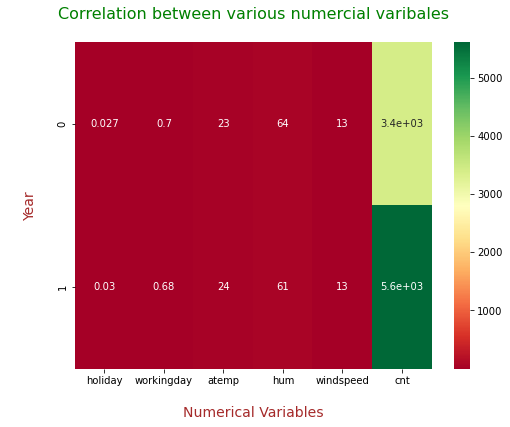

In [33]:
# To find correlation between 'year', 'atemp', 'humidity', 'windspeed', and no. of bike Rentals.
Yr_Bike = bike.groupby('yr')['holiday','workingday','atemp','hum','windspeed','cnt'].mean()
fig = plt.figure(figsize=(8,6))
sns.heatmap(Yr_Bike, cmap="RdYlGn", annot = True)
plt.title("Correlation between various numercial varibales\n", fontdict={'fontsize':16,'fontweight':5,'color':'Green'})
plt.xlabel("\nNumerical Variables",fontdict={'fontsize':14,'fontweight':8,'color':'Brown'})
plt.ylabel("\nYear\n",fontdict={'fontsize':14,'fontweight':8,'color':'Brown'})
plt.show()

### Inferences:
- As per the Heatmap highest no. of bike rentals are during 2019 eventhough atemp (feel like temp) is slightly higher, whereas humidity is little less.

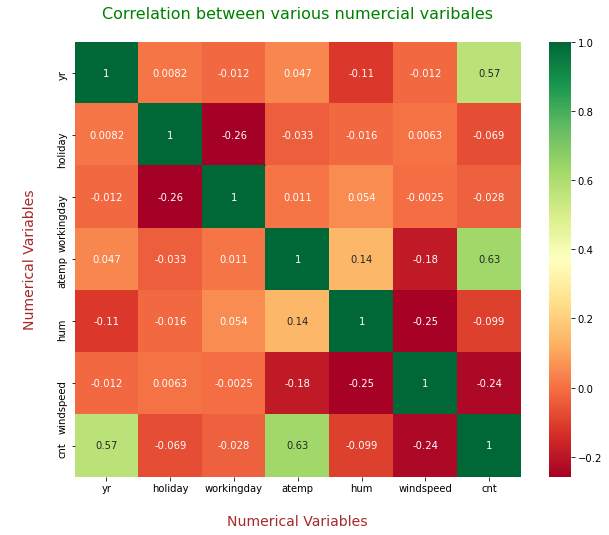

In [34]:
fig = plt.figure(figsize=(10,8))
sns.heatmap(bike.corr(), cmap="RdYlGn", annot = True)
plt.title("Correlation between various numercial varibales\n", fontdict={'fontsize':16,'fontweight':5,'color':'Green'})
plt.xlabel("\nNumerical Variables",fontdict={'fontsize':14,'fontweight':8,'color':'Brown'})
plt.ylabel("\nNumerical Variables\n",fontdict={'fontsize':14,'fontweight':8,'color':'Brown'})
plt.show()


#### Inferences:
- Holidays and bike renatals are inversely proportional to each other, therefore if as no. of holidays increases no. of bike rentals has been reduced.
- Humidity, Windspeed also inversely proportional to no. of bike rental's count. Therefore as windspeed and humidity increases no. of bike rentals reduces. 
- As per the heatmap highest corelated variable with no. of bike rentals is 'atemp'.

#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

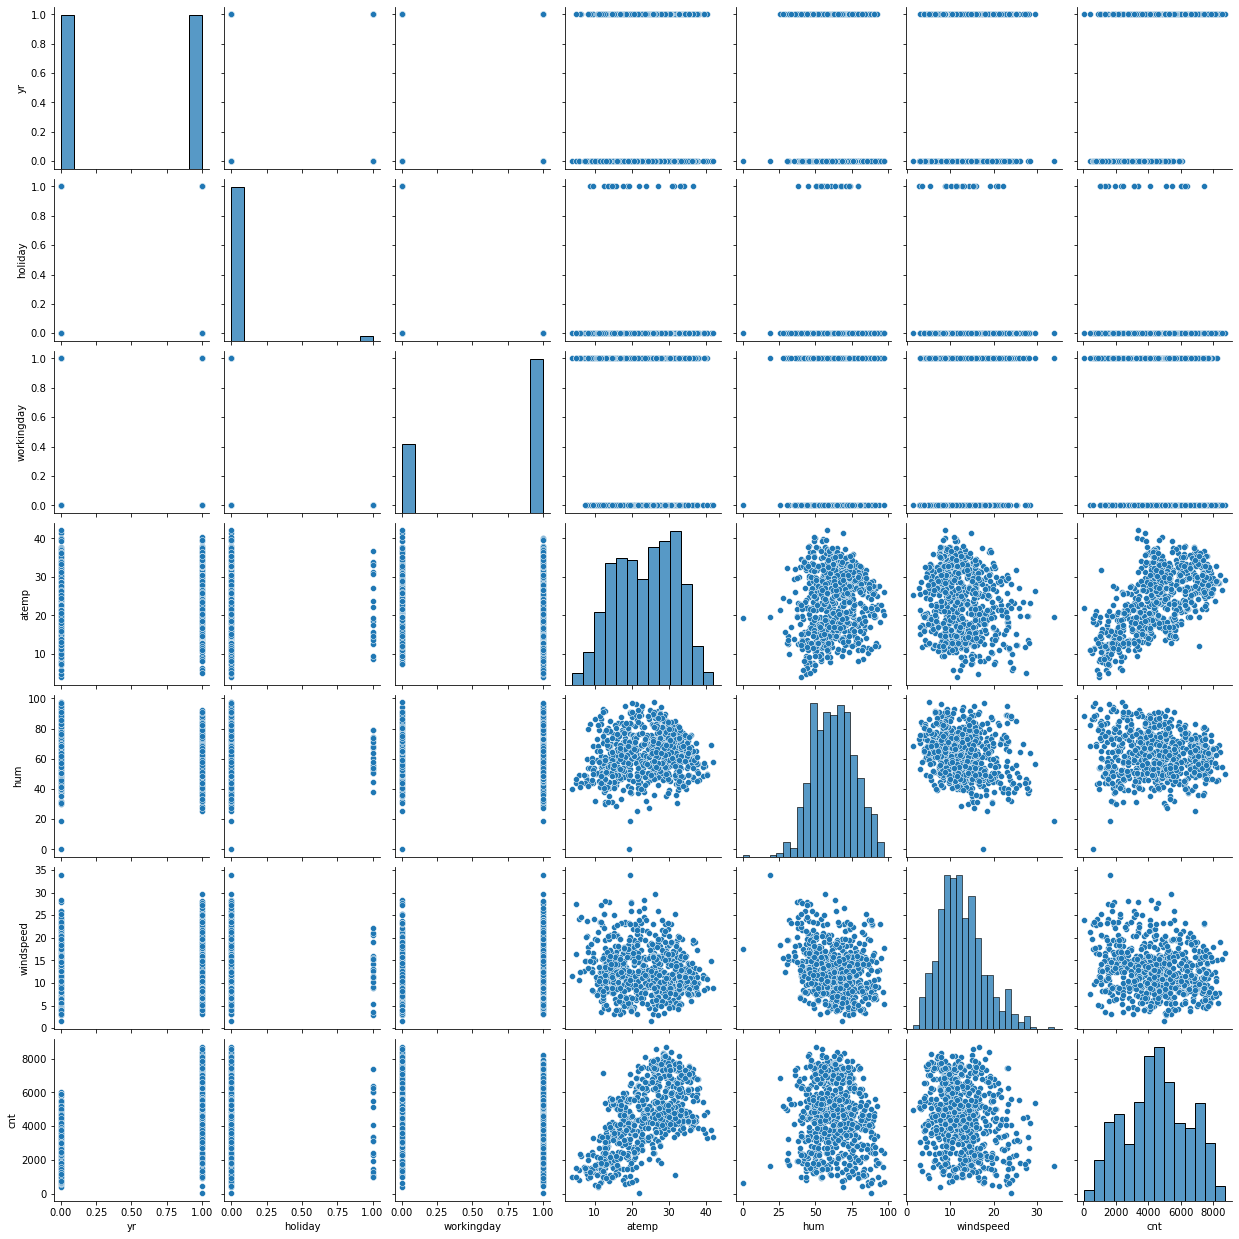

In [35]:
sns.pairplot(bike)
plt.show()


### Inferences
- As per the pairplot highest corelated variable with no. of bike rentals is 'atemp'.

In [36]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Mist_Few Clouds,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist_Few Clouds,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear or Partly Cloudy,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear or Partly Cloudy,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear or Partly Cloudy,11.46350,43.6957,12.522300,1600


## Step 3: Data Prepration .

### Preparing the Data for Modeling.

- Encoding
  - Converting Categorical variables to dummy variables

In [37]:
X_bike = bike # Create new dataframe from previous one.

In [38]:
X_bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Mon,1,Mist_Few Clouds,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tue,1,Mist_Few Clouds,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wed,1,Clear or Partly Cloudy,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thu,1,Clear or Partly Cloudy,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Fri,1,Clear or Partly Cloudy,11.46350,43.6957,12.522300,1600


### Dummy Variables

The variable `weathersit` has three levels and to convert these levels into integer we will use `dummy variables`.

In [39]:
# Get the dummy variables for the feature 'weathersit' and store it into a new variable
weather_dummy = pd.get_dummies(X_bike['weathersit'])


In [40]:
# Check what the dataset 'status' looks like
weather_dummy.head()

,Clear or Partly Cloudy,Light Rain_Light Snow,Mist_Few Clouds
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


In [41]:
# Add the results to the new bike dataframe
bike_new = pd.concat([X_bike, weather_dummy], axis = 1)


In [42]:
# Now check the head of new dataframe.
bike_new.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,Clear or Partly Cloudy,Light Rain_Light Snow,Mist_Few Clouds
0,spring,0,Jan,0,Mon,1,Mist_Few Clouds,18.18125,80.5833,10.749882,985,0,0,1
1,spring,0,Jan,0,Tue,1,Mist_Few Clouds,17.68695,69.6087,16.652113,801,0,0,1
2,spring,0,Jan,0,Wed,1,Clear or Partly Cloudy,9.47025,43.7273,16.636703,1349,1,0,0
3,spring,0,Jan,0,Thu,1,Clear or Partly Cloudy,10.60610,59.0435,10.739832,1562,1,0,0
4,spring,0,Jan,0,Fri,1,Clear or Partly Cloudy,11.46350,43.6957,12.522300,1600,1,0,0


In [43]:
# Now drop 'weathersit' as we have created the dummies for it
bike_new.drop(['weathersit'], axis = 1, inplace = True)


In [44]:
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,Clear or Partly Cloudy,Light Rain_Light Snow,Mist_Few Clouds
0,spring,0,Jan,0,Mon,1,18.18125,80.5833,10.749882,985,0,0,1
1,spring,0,Jan,0,Tue,1,17.68695,69.6087,16.652113,801,0,0,1
2,spring,0,Jan,0,Wed,1,9.47025,43.7273,16.636703,1349,1,0,0
3,spring,0,Jan,0,Thu,1,10.60610,59.0435,10.739832,1562,1,0,0
4,spring,0,Jan,0,Fri,1,11.46350,43.6957,12.522300,1600,1,0,0


In [45]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   season                  730 non-null    object 
 1   yr                      730 non-null    int64  
 2   mnth                    730 non-null    object 
 3   holiday                 730 non-null    int64  
 4   weekday                 730 non-null    object 
 5   workingday              730 non-null    int64  
 6   atemp                   730 non-null    float64
 7   hum                     730 non-null    float64
 8   windspeed               730 non-null    float64
 9   cnt                     730 non-null    int64  
 10  Clear or Partly Cloudy  730 non-null    uint8  
 11  Light Rain_Light Snow   730 non-null    uint8  
 12  Mist_Few Clouds         730 non-null    uint8  
dtypes: float64(3), int64(4), object(3), uint8(3)
memory usage: 59.3+ KB


In [46]:
# Get the dummy variables for the feature 'season' and store it into a new variable
season_dummy = pd.get_dummies(bike_new['season'])


In [47]:
season_dummy.head() # To see the head of the new variable

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [48]:
# Add the new variable into bike dataframe
bike_new = pd.concat([bike_new, season_dummy], axis = 1)


In [49]:
# Drop 'fseason' as we have created the dummies for it
bike_new.drop(['season'], axis = 1, inplace = True)


In [50]:
bike_new.head() # To see the head of the new variable

,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,Clear or Partly Cloudy,Light Rain_Light Snow,Mist_Few Clouds,fall,spring,summer,winter
0,0,Jan,0,Mon,1,18.18125,80.5833,10.749882,985,0,0,1,0,1,0,0
1,0,Jan,0,Tue,1,17.68695,69.6087,16.652113,801,0,0,1,0,1,0,0
2,0,Jan,0,Wed,1,9.47025,43.7273,16.636703,1349,1,0,0,0,1,0,0
3,0,Jan,0,Thu,1,10.60610,59.0435,10.739832,1562,1,0,0,0,1,0,0
4,0,Jan,0,Fri,1,11.46350,43.6957,12.522300,1600,1,0,0,0,1,0,0


In [51]:
# Get Dummy variable for the month variable
mnth_dummy = pd.get_dummies(bike_new['mnth'])
mnth_dummy.head()  


,April,August,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sept
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0


In [52]:
# Connect dummy variables with 
bike_new = pd.concat([bike_new, mnth_dummy], axis = 1)


In [53]:
bike_new.head()

,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,Clear or Partly Cloudy,Light Rain_Light Snow,Mist_Few Clouds,fall,spring,summer,winter,April,August,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sept
0,0,Jan,0,Mon,1,18.18125,80.5833,10.749882,985,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,Jan,0,Tue,1,17.68695,69.6087,16.652113,801,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,Jan,0,Wed,1,9.47025,43.7273,16.636703,1349,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,Jan,0,Thu,1,10.60610,59.0435,10.739832,1562,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,Jan,0,Fri,1,11.46350,43.6957,12.522300,1600,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [54]:
# Now 'mnth' column is not required as dummy variables are laready created for the same
bike_new.drop(['mnth'], axis = 1, inplace = True)


In [55]:
bike_new.head()

,yr,holiday,weekday,workingday,atemp,hum,windspeed,cnt,Clear or Partly Cloudy,Light Rain_Light Snow,Mist_Few Clouds,fall,spring,summer,winter,April,August,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sept
0,0,0,Mon,1,18.18125,80.5833,10.749882,985,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,Tue,1,17.68695,69.6087,16.652113,801,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,Wed,1,9.47025,43.7273,16.636703,1349,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,Thu,1,10.60610,59.0435,10.739832,1562,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,Fri,1,11.46350,43.6957,12.522300,1600,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [56]:
# To get dummy variables for the weekdays
weekday_dummy = pd.get_dummies(bike_new['weekday'])


In [57]:
weekday_dummy.head()

,Fri,Mon,Sat,Sun,Thu,Tue,Wed
0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0


In [58]:
# Connect dummy variables with the dataframe
bike_new = pd.concat([bike_new, weekday_dummy], axis = 1)


In [59]:
bike_new.head()

,yr,holiday,weekday,workingday,atemp,hum,windspeed,cnt,Clear or Partly Cloudy,Light Rain_Light Snow,Mist_Few Clouds,fall,spring,summer,winter,April,August,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sept,Fri,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,Mon,1,18.18125,80.5833,10.749882,985,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,Tue,1,17.68695,69.6087,16.652113,801,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,Wed,1,9.47025,43.7273,16.636703,1349,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,Thu,1,10.60610,59.0435,10.739832,1562,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,Fri,1,11.46350,43.6957,12.522300,1600,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [60]:
# Now 'weekday' column is not required as its' dummy variables are created
bike_new.drop(['weekday'], axis = 1, inplace = True)


In [61]:
bike_new.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Clear or Partly Cloudy,Light Rain_Light Snow,Mist_Few Clouds,fall,spring,summer,winter,April,August,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sept,Fri,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,1,18.18125,80.5833,10.749882,985,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,1,17.68695,69.6087,16.652113,801,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [62]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   yr                      730 non-null    int64  
 1   holiday                 730 non-null    int64  
 2   workingday              730 non-null    int64  
 3   atemp                   730 non-null    float64
 4   hum                     730 non-null    float64
 5   windspeed               730 non-null    float64
 6   cnt                     730 non-null    int64  
 7   Clear or Partly Cloudy  730 non-null    uint8  
 8   Light Rain_Light Snow   730 non-null    uint8  
 9   Mist_Few Clouds         730 non-null    uint8  
 10  fall                    730 non-null    uint8  
 11  spring                  730 non-null    uint8  
 12  summer                  730 non-null    uint8  
 13  winter                  730 non-null    uint8  
 14  April                   730 non-null    ui

## Step 4: Splitting the Data into Training and Testing Sets

The very first basic step for regression is performing a train-test split.

In [63]:
#from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
bike_train, bike_test = train_test_split(bike_new, train_size = 0.7, test_size = 0.3, random_state = 100)


In [64]:
bike_train.shape

(510, 33)

In [65]:
bike_test.shape   

(219, 33)

## Step 5: Rescaling the Features 

In Simple Linear Regression, scaling doesn't impact. When variable has little different interger values then rescale the variables to make themm comparable. Without comparable scales, some of the coefficients obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This may be very critical during model evaluation. Therefore standardization or normalization should be used so that the units of all the coefficients would be on the same scale. There are two types of rescaling:

1. Standardisation (mean-0, sigma-1)
2. Min-Max scaling : Between 0 and 1

Here, I will use Min-Max scaling.


In [66]:
bike_new.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Clear or Partly Cloudy,Light Rain_Light Snow,Mist_Few Clouds,fall,spring,summer,winter,April,August,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sept,Fri,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,1,18.18125,80.5833,10.749882,985,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,1,17.68695,69.6087,16.652113,801,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [67]:
# Do scaling
bike_scaler = MinMaxScaler()


In [68]:
# Create List of variables

# Apply scaler() to all the columns except the 'dummy' variables
bike_num_vars = ['atemp', 'hum','windspeed', 'cnt']

# 2 Fit on data
bike_train[bike_num_vars] = bike_scaler.fit_transform(bike_train[bike_num_vars])


In [69]:
bike_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Clear or Partly Cloudy,Light Rain_Light Snow,Mist_Few Clouds,fall,spring,summer,winter,April,August,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sept,Fri,Mon,Sat,Sun,Thu,Tue,Wed
653,1,0,1,0.501133,0.575354,0.300794,0.864243,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
576,1,0,1,0.766351,0.725633,0.264686,0.827658,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.438975,0.640189,0.255342,0.465255,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
728,1,0,1,0.200348,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [70]:
bike_train.describe()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Clear or Partly Cloudy,Light Rain_Light Snow,Mist_Few Clouds,fall,spring,summer,winter,April,August,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sept,Fri,Mon,Sat,Sun,Thu,Tue,Wed
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.512989,0.650369,0.320768,0.513620,0.627451,0.029412,0.343137,0.262745,0.243137,0.245098,0.24902,0.078431,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392,0.147059,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294
std,0.500429,0.157763,0.453386,0.212385,0.145882,0.169797,0.224593,0.483958,0.169124,0.475223,0.440557,0.429398,0.430568,0.43287,0.269113,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166,0.354512,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.526811,0.653714,0.296763,0.518638,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.688457,0.754830,0.414447,0.684710,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


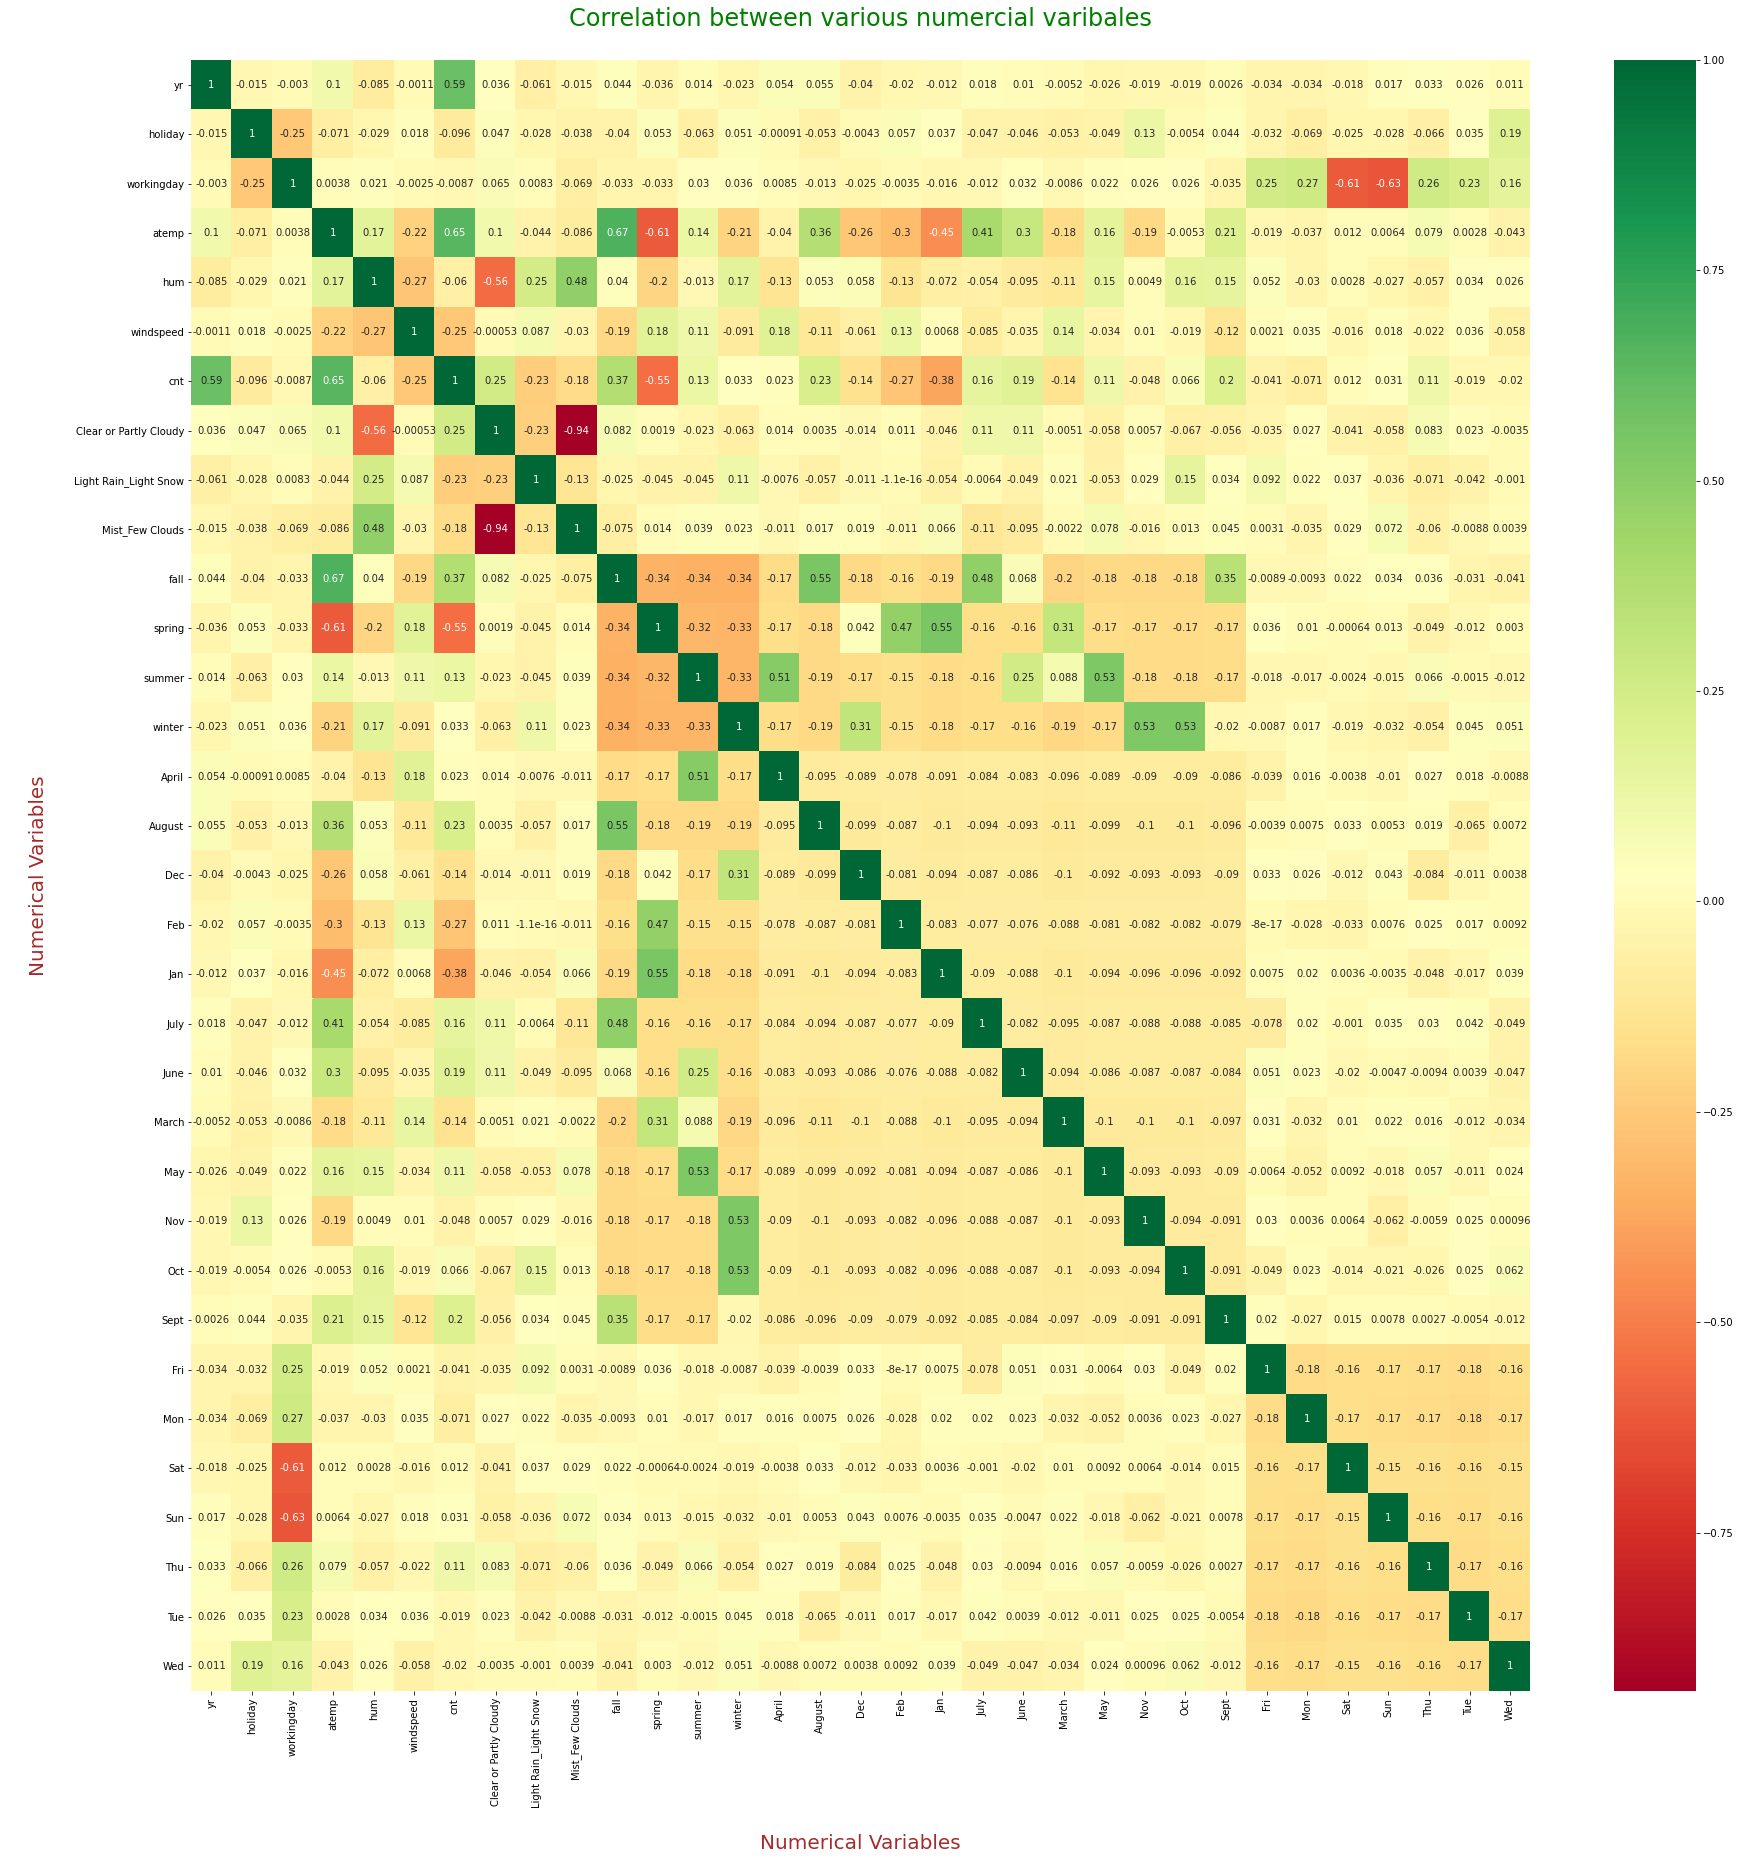

In [71]:
# To recheck the correlation coefficients to know which variables are highly correlated
fig = plt.figure(figsize = (30, 30))
sns.heatmap(bike_train.corr(), cmap="RdYlGn", annot = True )
plt.title("Correlation between various numercial varibales\n", fontdict={'fontsize':24,'fontweight':5,'color':'Green'})
plt.xlabel("\nNumerical Variables",fontdict={'fontsize':20,'fontweight':8,'color':'Brown'})
plt.ylabel("\nNumerical Variables\n",fontdict={'fontsize':20,'fontweight':8,'color':'Brown'})
plt.show()

- Variable `atemp` is highly correlated to the 'cnt', and no. of bike rentals are more in '2019' in comaprision to '2018', 
- Other correlated variables which affacts no. of bike rentals are 'fall', 'Clear or Partly Cloudy',

In [72]:
bike_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,Clear or Partly Cloudy,Light Rain_Light Snow,Mist_Few Clouds,fall,spring,summer,winter,April,August,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sept,Fri,Mon,Sat,Sun,Thu,Tue,Wed
653,1,0,1,0.501133,0.575354,0.300794,0.864243,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
576,1,0,1,0.766351,0.725633,0.264686,0.827658,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
426,1,0,0,0.438975,0.640189,0.255342,0.465255,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
728,1,0,1,0.200348,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [73]:
bike_train.shape

(510, 33)

### Dividing into X and Y sets for the model building

In [74]:
# x_train, y_train
y_train = bike_train.pop('cnt')
X_train = bike_train


## Step 6. Building the model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

In [75]:
# Running RFE with the output number of the variable equal to 10
lm_bike = LinearRegression()
lm_bike.fit(X_train, y_train)

bike_rfe = RFE(lm_bike, 15)             # running RFE
bike_rfe = bike_rfe.fit(X_train, y_train)


In [76]:
list(zip(X_train.columns, bike_rfe.support_, bike_rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 17),
 ('workingday', False, 18),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Clear or Partly Cloudy', True, 1),
 ('Light Rain_Light Snow', True, 1),
 ('Mist_Few Clouds', False, 2),
 ('fall', True, 1),
 ('spring', True, 1),
 ('summer', False, 9),
 ('winter', True, 1),
 ('April', False, 15),
 ('August', True, 1),
 ('Dec', True, 1),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('July', False, 8),
 ('June', False, 4),
 ('March', False, 16),
 ('May', False, 3),
 ('Nov', True, 1),
 ('Oct', False, 14),
 ('Sept', True, 1),
 ('Fri', False, 13),
 ('Mon', False, 6),
 ('Sat', False, 11),
 ('Sun', False, 10),
 ('Thu', False, 12),
 ('Tue', False, 5),
 ('Wed', False, 7)]

In [77]:
col_bike = X_train.columns[bike_rfe.support_]
col_bike


Index(['yr', 'atemp', 'hum', 'windspeed', 'Clear or Partly Cloudy', 'Light Rain_Light Snow', 'fall', 'spring', 'winter', 'August', 'Dec', 'Feb', 'Jan', 'Nov', 'Sept'], dtype='object')

In [78]:
X_train.columns[~bike_rfe.support_]

Index(['holiday', 'workingday', 'Mist_Few Clouds', 'summer', 'April', 'July', 'June', 'March', 'May', 'Oct', 'Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'], dtype='object')

### Building model using statsmodel, for the detailed statistics

### Model 1.

In [79]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[col_bike]


In [80]:
# Adding a constant variable 
X_train_rfe_bike = sm.add_constant(X_train_rfe)


In [81]:
lm_bike = sm.OLS(y_train, X_train_rfe_bike).fit()   # Running the linear model

In [82]:
print(lm_bike.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     171.9
Date:                Mon, 10 May 2021   Prob (F-statistic):          5.82e-185
Time:                        21:47:27   Log-Likelihood:                 504.59
No. Observations:                 510   AIC:                            -977.2
Df Residuals:                     494   BIC:                            -909.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

### Checking VIF

Variance inflation Factor or VIF, gives a basic quantitative idea how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating VIF is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

### We could have:
- High P-value, High VIF---Remove these variables
- High-low:
     - High P, low VIF--- Remove these variables first
     - Low P, high VIF--- Remove these after the one above
     - Low P, Low VIF--- Keep these variables
     
     
 - VIF Values
      - VIF < 5 is Good --- no need to eliminate this variable
      - VIF > 5 can be Okay --- need to inspect
      - VIF > 10 is definitely high and the respective variable need to remove
 
 - P value < 0.05 is Good.
 

In [83]:
# Create a dataframe that will contain the names of all the feature variables and the respect.
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
1,atemp,24.39
2,hum,20.49
6,fall,4.49
7,spring,4.28
3,windspeed,4.18
4,Clear or Partly Cloudy,3.33
8,winter,3.33
12,Jan,2.47
0,yr,2.07
11,Feb,1.94


### Model 2.

In [84]:
# Dropping a variable which has higher P and/or higher VIF value
X_train_rfe = X_train_rfe.drop(["atemp"], axis = 1)


In [85]:
# Adding a constant variable 
X_train_lm_atemp = sm.add_constant(X_train_rfe)


In [86]:
lm_bike_atemp = sm.OLS(y_train, X_train_lm_atemp).fit()   # Running the linear model

In [87]:
print(lm_bike_atemp.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     139.8
Date:                Mon, 10 May 2021   Prob (F-statistic):          9.19e-162
Time:                        21:47:48   Log-Likelihood:                 446.54
No. Observations:                 510   AIC:                            -863.1
Df Residuals:                     495   BIC:                            -799.6
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [88]:
# Create a dataframe that will contain the names of all the feature variables and the respect.
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
1,hum,6.31
2,windspeed,4.09
6,spring,4.09
5,fall,3.35
7,winter,3.31
3,Clear or Partly Cloudy,2.52
11,Jan,2.17
0,yr,1.99
8,August,1.86
10,Feb,1.86


### Model 3.

In [89]:
# Dropping a variable which has higher P and/or higher VIF value
X_train_rfe = X_train_rfe.drop(["hum"], axis = 1)


In [90]:
# Adding a constant variable 
X_train_lm_hum = sm.add_constant(X_train_rfe)


In [91]:
lm_bike_hum = sm.OLS(y_train, X_train_lm_hum).fit()   # Running the linear model

In [92]:
print(lm_bike_hum.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     150.5
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.14e-162
Time:                        21:48:07   Log-Likelihood:                 446.08
No. Observations:                 510   AIC:                            -864.2
Df Residuals:                     496   BIC:                            -804.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [93]:
# Create a dataframe that will contain the names of all the feature variables and the respect.
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
5,spring,3.97
1,windspeed,3.05
4,fall,3.00
6,winter,2.82
2,Clear or Partly Cloudy,2.51
10,Jan,2.15
0,yr,1.88
9,Feb,1.86
7,August,1.85
11,Nov,1.78


### Model 4.

In [94]:
# Dropping a variable which has higher P and/or higher VIF value
X_train_rfe = X_train_rfe.drop(["August"], axis = 1)


In [95]:
# Adding a constant variable 
X_train_lm_Aug = sm.add_constant(X_train_rfe)


In [96]:
lm_bike_Aug = sm.OLS(y_train, X_train_lm_Aug).fit()  # Running the linear model

In [97]:
print(lm_bike_Aug.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     162.3
Date:                Mon, 10 May 2021   Prob (F-statistic):          3.18e-163
Time:                        21:48:26   Log-Likelihood:                 444.75
No. Observations:                 510   AIC:                            -863.5
Df Residuals:                     497   BIC:                            -808.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [98]:
# Create a dataframe that will contain the names of all the feature variables and the respect.
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
5,spring,3.96
1,windspeed,3.05
6,winter,2.79
2,Clear or Partly Cloudy,2.49
9,Jan,2.15
4,fall,1.88
0,yr,1.87
8,Feb,1.86
10,Nov,1.77
7,Dec,1.54


#### Adding few other variables to check if model will improve

### Model 5.

In [100]:
# Need to add variable if there is any improvement
X_train_rfe['holiday'] = X_train['holiday']


In [101]:
X_train_rfe.head()

,yr,windspeed,Clear or Partly Cloudy,Light Rain_Light Snow,fall,spring,winter,Dec,Feb,Jan,Nov,Sept,holiday
653,1,0.300794,1,0,0,0,1,0,0,0,0,0,0
576,1,0.264686,1,0,1,0,0,0,0,0,0,0,0
426,1,0.255342,0,0,0,1,0,0,0,0,0,0,0
728,1,0.663106,1,0,0,1,0,1,0,0,0,0,0
482,1,0.188475,0,0,0,0,0,0,0,0,0,0,0


In [102]:
# To add constant and fit the linear model
X_train_Holdy = sm.add_constant(X_train_rfe)
lm_bike_Holdy = sm.OLS(y_train,X_train_Holdy).fit()


In [103]:
print(lm_bike_Holdy.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     152.3
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.10e-163
Time:                        21:54:22   Log-Likelihood:                 448.50
No. Observations:                 510   AIC:                            -869.0
Df Residuals:                     496   BIC:                            -809.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [104]:
# Create a dataframe that will contain the names of all the feature variables and the respect.
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
5,spring,3.96
1,windspeed,3.05
6,winter,2.79
2,Clear or Partly Cloudy,2.49
9,Jan,2.16
4,fall,1.88
0,yr,1.87
8,Feb,1.86
10,Nov,1.80
7,Dec,1.54


#### Inferences
- Model improves by adding 'holiday' .
- Now we will add one more variable and check if model will improve llittle more.

### Model 6.

In [105]:
# Need to add variable if there is any improvement
X_train_rfe['summer'] = X_train['summer']


In [106]:
X_train_rfe.head()


,yr,windspeed,Clear or Partly Cloudy,Light Rain_Light Snow,fall,spring,winter,Dec,Feb,Jan,Nov,Sept,holiday,summer
653,1,0.300794,1,0,0,0,1,0,0,0,0,0,0,0
576,1,0.264686,1,0,1,0,0,0,0,0,0,0,0,0
426,1,0.255342,0,0,0,1,0,0,0,0,0,0,0,0
728,1,0.663106,1,0,0,1,0,1,0,0,0,0,0,0
482,1,0.188475,0,0,0,0,0,0,0,0,0,0,0,1


In [107]:
# To add constant and fit the linear model
X_train_Sumr = sm.add_constant(X_train_rfe)
lm_bike_Sumr = sm.OLS(y_train,X_train_Sumr).fit()


In [108]:
print(lm_bike_Sumr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     152.3
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.10e-163
Time:                        22:03:15   Log-Likelihood:                 448.50
No. Observations:                 510   AIC:                            -869.0
Df Residuals:                     496   BIC:                            -809.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [109]:
# Create a dataframe that will contain the names of all the feature variables and the respect.
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
5,spring,5.46
6,winter,3.74
4,fall,2.92
13,summer,2.82
9,Jan,1.98
8,Feb,1.74
10,Nov,1.65
7,Dec,1.42
11,Sept,1.20
1,windspeed,1.11


### Inferences:
- By adding 'summer' variable there is no improvement in R-squared value but it increases VIF of few other variables. Terefore we need to drop this variable.

### Model 7.

In [111]:
# Dropping a variable which has higher P and/or higher VIF value
X_train_rfe = X_train_rfe.drop(["summer"], axis = 1)


In [112]:
# Adding a constant variable 
X_train_lm_Holdy2 = sm.add_constant(X_train_rfe)


In [113]:
lm_bike_Holdy2 = sm.OLS(y_train, X_train_lm_Holdy2).fit()  # Running the linear model


In [114]:
print(lm_bike_Holdy2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     152.3
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.10e-163
Time:                        22:08:50   Log-Likelihood:                 448.50
No. Observations:                 510   AIC:                            -869.0
Df Residuals:                     496   BIC:                            -809.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [115]:
# Create a dataframe that will contain the names of all the feature variables and the respect.
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
5,spring,3.96
1,windspeed,3.05
6,winter,2.79
2,Clear or Partly Cloudy,2.49
9,Jan,2.16
4,fall,1.88
0,yr,1.87
8,Feb,1.86
10,Nov,1.80
7,Dec,1.54


### Inferences
- Now this final model (Model 7) seems to be good as it has almost similar R-Squared and Adjusted R-Squared with approx. 80% value.
- As well as all the slected variables has controlled / in-range P-vlaues and VIF values.

### Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [116]:
y_train_cnt = lm_bike_Holdy2.predict(X_train_lm_Holdy2)

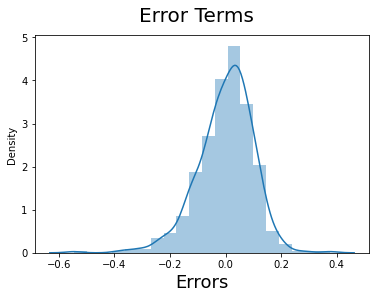

In [117]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

In [118]:
X_train_lm_Holdy2.columns

Index(['const', 'yr', 'windspeed', 'Clear or Partly Cloudy', 'Light Rain_Light Snow', 'fall', 'spring', 'winter', 'Dec', 'Feb', 'Jan', 'Nov', 'Sept', 'holiday'], dtype='object')

In [119]:
X_train_lm_Holdy2.shape

(510, 14)

### Step 8. Making predictions with final model

In [120]:
#Scaling the numerical test data
bike_num_vars = ['atemp','hum','windspeed','cnt']
bike_test[bike_num_vars] = bike_scaler.transform(bike_test[bike_num_vars])


### Dividing into X and Y test sets for the model building

In [121]:
#Creating x and y sets
y_test = bike_test.pop('cnt')
X_test = bike_test


In [122]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [123]:
# predicting using values used by the final model
test_col = X_train_lm_Holdy2.columns
X_test = X_test[test_col[1:]]


In [124]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)


In [125]:
X_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 184 to 72
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   const                   219 non-null    float64
 1   yr                      219 non-null    int64  
 2   windspeed               219 non-null    float64
 3   Clear or Partly Cloudy  219 non-null    uint8  
 4   Light Rain_Light Snow   219 non-null    uint8  
 5   fall                    219 non-null    uint8  
 6   spring                  219 non-null    uint8  
 7   winter                  219 non-null    uint8  
 8   Dec                     219 non-null    uint8  
 9   Feb                     219 non-null    uint8  
 10  Jan                     219 non-null    uint8  
 11  Nov                     219 non-null    uint8  
 12  Sept                    219 non-null    uint8  
 13  holiday                 219 non-null    int64  
dtypes: float64(2), int64(2), uint8(10)
memory

In [126]:
# Making predictions using the final model
y_pred = lm_bike_Holdy2.predict(X_test)


In [127]:
# To check value of r2 score 
r2_score(y_test, y_pred)


0.7842777375150596

In [128]:
# To find measn square value
bike_mse = mean_squared_error(y_test, y_pred)


In [129]:
bike_mse

0.010245903192729802

## Step 9: Model Evaluation

- Plot the graph between actual versus predicted values.

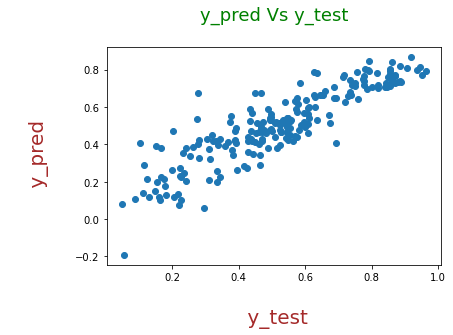

In [130]:
# Plot graph between Predicated and Test Data 
fig = plt.figure()
plt.scatter(y_test,y_pred)
plt.title("y_pred Vs y_test\n", fontdict={'fontsize':18,'fontweight':5,'color':'Green'})
plt.xlabel("\n y_test",fontdict={'fontsize':20,'fontweight':8,'color':'Brown'})
plt.ylabel("\n y_pred\n",fontdict={'fontsize':20,'fontweight':8,'color':'Brown'})
plt.show()


In [131]:
print(lm_bike_Holdy2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     152.3
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.10e-163
Time:                        22:12:05   Log-Likelihood:                 448.50
No. Observations:                 510   AIC:                            -869.0
Df Residuals:                     496   BIC:                            -809.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

### The equation of our best fitted line is:

cnt = 0.245 X yr - 0.192 X windspeed + 0.087 X Clear or Partly Cloudy - 0.226 X Light Rain_Light Snow + 0.045 X fall - 0.152 X spring + 0.036 X winter - 0.129 X Dec - 0.102 X Feb - 0.167 X Jan - 0.108 X Nov + 0.056 X Sept - 0.079 X holiday.     

- As per the model Bike **demand depends** on various variables like yr, Clear or Partly Cloudy, Sept, fall, winter, Feb, Nov, Dec, spring, Jan, windspeed, Light Rain_Light Snow.

- Bike **demand increases** during yr, Clear or Partly Cloudy, Sept, fall, winter .

- Bike **demand decreases** during high windspeed, holidays, Light Rain_Light Snow weather, as well as during the month of Nov, Dec, Jan, Feb, and spring season.

- Bike **demand is higher** in the month of Sept, during fall season, during Clear or Partly Cloudy weather and slightly during winter season.


- Overall bike rental **demands depends mostly** on holidays, weather, month and season which also means variation in temperature also affects bike rentals. 


### Conclusion
Now we have a fairly descent model but always there are chances of further improvements, which don't have much difference in predicated and test data and there is a linearity between test and predicted data.

## End of RFE_Bike Analysis